<a href="https://colab.research.google.com/github/giacomocolonetti/giacomocolonetti/blob/main/me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Me, in data

Dizem que dados, quando corretamente manipulados, são capazes de contar  histórias. Então resolvi contar um pouco sobre a minha utilizando este Jupyter Notebook e um pouco de Pandas, Matplotlib e outras bibliotecas do Python.

---


# Aprendendo a aprender

Se você reparou nas informações da minha graduação no LinkedIn, deve ter ficado curioso sobre sua duração prolongada.

Iniciei a faculdade de Engenharia de Materiais no segundo semestre de 2014 e estarei me formando nos próximos meses, sendo o Trabalho de Conclusão de Curso, em fase de elaboração, minha única pendência com a universidade.

Abaixo você poderá consultar um gráfico que dará uma pista sobre o extenso período da minha graduação.

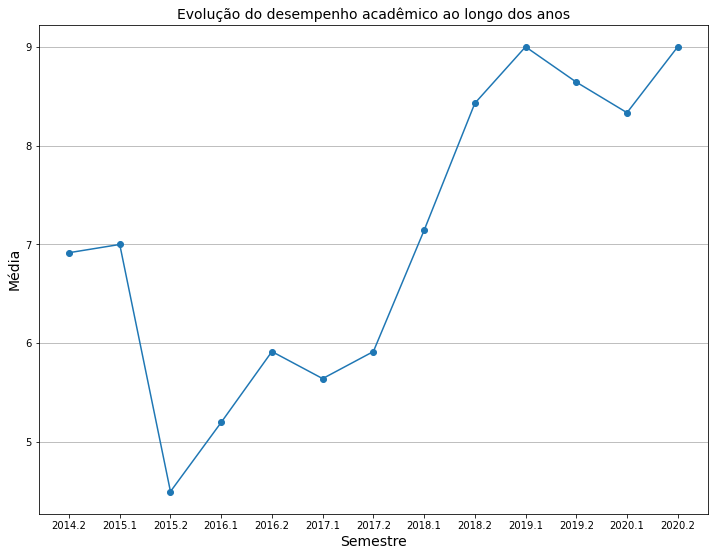

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('https://raw.githubusercontent.com/giacomocolonetti/giacomocolonetti/main/historico.json')
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')
df['grade_average'] = df.groupby('Semestre')['Nota'].transform('mean')
df['Semestre'] = df['Semestre'].astype(str)
df.dropna(subset=['Nota'], inplace=True)

grade_average_df = df[['Semestre', 'grade_average']].copy(deep=True)
grade_average_df['Semestre'] = grade_average_df['Semestre'].astype(str)
grade_average_df.drop_duplicates(subset='Semestre', inplace=True)

fig, ax1 = plt.subplots()
fig.set_size_inches(12,9)

font1 = {'size':'14'}
ax1.set_xlabel('Semestre', fontdict = font1)
ax1.set_ylabel('Média', fontdict = font1)
ax1.set_title('Evolução do desempenho acadêmico ao longo dos anos', fontdict = font1)

ax1.grid(axis = 'y')
ax1.plot(grade_average_df['Semestre'], grade_average_df['grade_average'], marker = 'o')
plt.show()

Quando ingressei na faculdade, acreditava que o objetivo era conseguir as notas **necessárias** para passar nas disciplinas, evoluir durante os semestres e obter o diploma, assim como foi durante o ensino médio.

Por dois semestres segui a mesma receita e tudo ia bem: frequentar as aulas, prestar **alguma** atenção, copiar o conteúdo no caderno e estudar um ou dois dias antes da prova.

...

Até a chegada do semestre 2015.2


Me matriculei em Física I e II no mesmo semestre acreditando que, se seguisse a receita que até então tinha funcionado, tudo daria certo. 

Isso me lembra o **problema do peru** de Nassim Nicholas Taleb, que considera o crescimento linear do bem-estar de um peru que recebe alimento diariamente. Com base no histórico de alguns dias, o peru pode inferir um comportamento linear de seu bem-estar, continuando a crescer indefinidamente. Mas, como o peru não tem o dom de prever o futuro, o dia de ação de graças chega e redefine a trajetória de sua curva de bem-estar.

Naquele semestre, eu era o peru confiante.

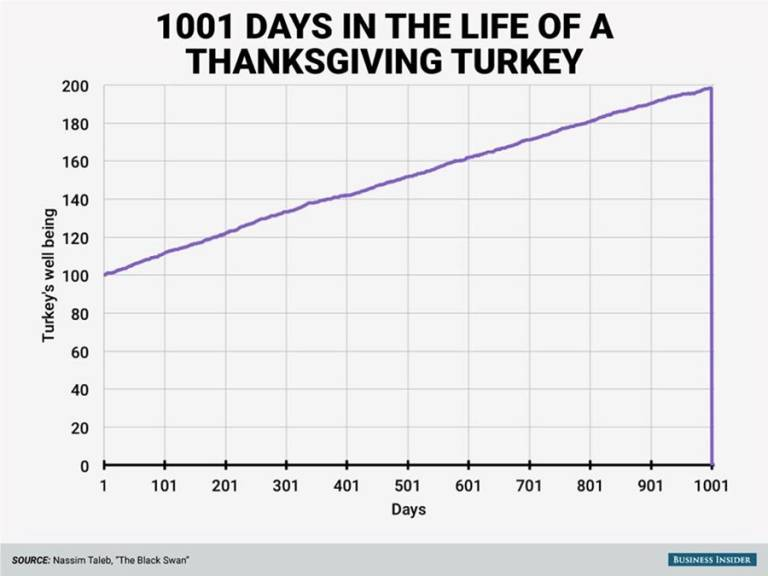

A partir de então, patinei um pouco até compreender que os objetivos da graduação eram o desenvolvimento pessoal e profissional próprio e que o diploma na verdade não importava tanto quanto o conhecimento obtido.

Foi só a partir do segundo semestre de 2017 que percebi que o único jeito era sentar na cadeira, abrir os livros e estudar. No começo não foi fácil, aquilo era maçante, chato e cansativo. Levei certo tempo para entender a real importância daquilo, para conseguir manter o foco apesar da dificuldade e nível de abstração do problema e, principalmente, para **aprender a aprender**.

Ao longo do segundo semestre de 2018, comecei a ver o resultado do esforço e principalmente da mudança de hábitos e criação de disciplina, não somente pelas notas obtidas, mas pelo nível de satisfação própria que atingi sabendo que estava progredindo em direção aos meus objetivos, subindo dia após dia um pequeno degrau de uma escada maior.

No box plot abaixo fica evidente que a variância das médias individuais também diminuiu, indicando que a melhora ocorreu como um todo e que a média não foi distorcida por *outliers*.

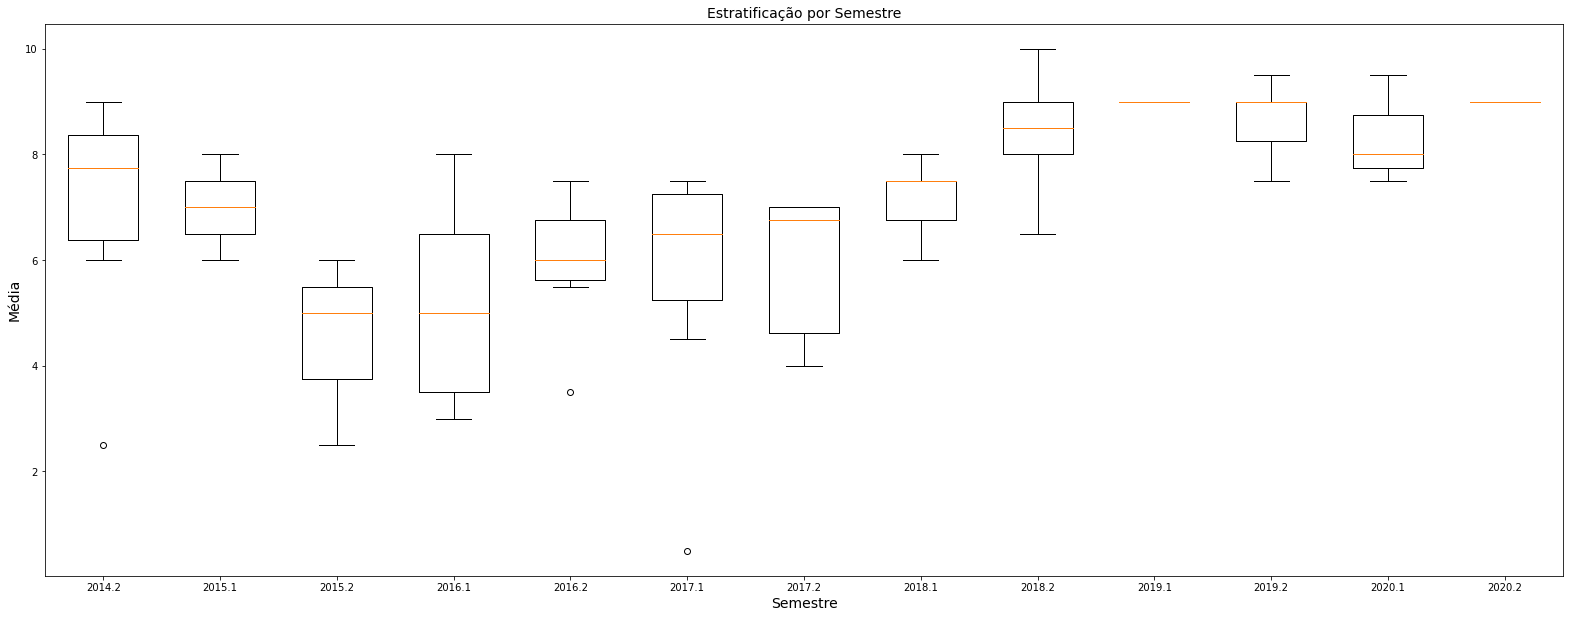

In [2]:
fig2, ax2 = plt.subplots()
fig2.tight_layout()
fig2.set_size_inches(24,9)

ax2.set_xlabel('Semestre', fontdict = font1)
ax2.set_ylabel('Média', fontdict = font1)
ax2.set_title('Estratificação por Semestre', fontdict = font1)

semestres = df['Semestre'].unique().tolist()
df_dict = {elem : pd.DataFrame for elem in semestres}

for key in df_dict.keys():
  df_dict[key] = df[:][df['Semestre'] == key]

ax2.set_xticklabels(semestres)
for semester in semestres:
  ax2.boxplot(df_dict[semester]['Nota'], positions=[semestres.index(semester)], widths=0.6)

E embora eu não tenha coletado dados sobre a quantidade de horas diárias dedicadas ao estudo e a diversão, usei duas equações exponenciais que representam bem o comportamento destes números durante o período. Quando estabelecemos uma correlação entre estes números, fica evidente que o tempo dedicado ao estudo possui uma correlação direta e significativa com o aprendizado, ao passo que uma redução das horas dedicadas ao lazer para níveis mais saudáveis promoveu um incremento no meu desenvolvimento e satisfação pessoal.

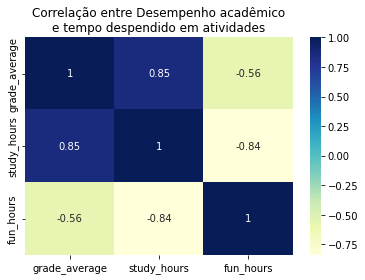

In [13]:
from math import exp
from random import random
import seaborn as sns

study_hours = [random() for i in range(5)]
study_hours += [(1-exp(-0.1*x))*36 for x in range(1, 9)]
fun_hours = [(exp(-0.22*x))*8 for x in range(13)]

grade_average_df['study_hours'] = study_hours
grade_average_df['fun_hours'] = fun_hours

corr = grade_average_df.corr()
ax3 = plt.axes()
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values, cmap= 'YlGnBu', annot=True, ax=ax3)
ax3.set_title('Correlação entre Desempenho acadêmico\ne tempo despendido em atividades')
plt.show()

A partir de então aprender se tornou um vício e desenvolvi um novo hobbie: a leitura.

Particularmente prefiro os livros físicos. Existem poucas coisas mais satisfatórias que sentir o cheiro de um livro novo quando você abre o pacote cuidadosamente embalado pela Amazon. Além disso, o tato, as páginas amereladas que não cansam seus olhos e a ausência de distrações são coisas únicas que apenas um livro físico é capaz de proporcionar.

Com o perdão do esquecimento de um ou outro livro, podemos visualizar a quantidade de páginas lidas por ano ao longo do tempo:

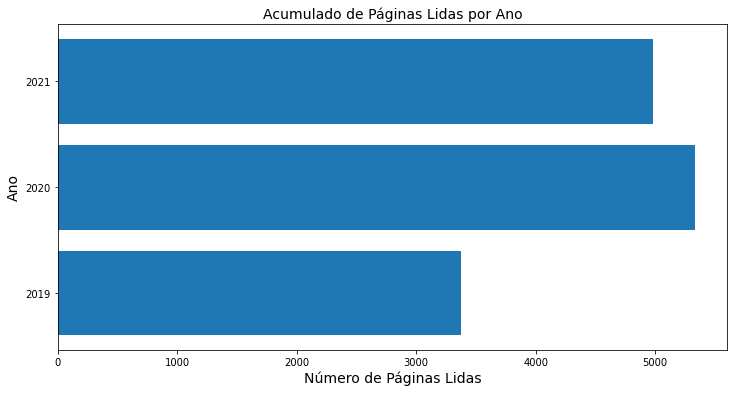

In [52]:
books_df = pd.read_csv('https://raw.githubusercontent.com/giacomocolonetti/giacomocolonetti/main/livros.csv')
books_df['Livro'] = books_df['Livro'].astype(str)
books_df['Ano'] = books_df['Ano'].astype(str)
books_df = books_df.groupby(['Ano']).sum()

fig4, ax4 = plt.subplots()
fig4.set_size_inches(12,6)
ax4.barh(books_df.index, books_df['Paginas'])
ax4.set_xlabel('Número de Páginas Lidas', fontdict= font1)
ax4.set_ylabel('Ano', fontdict= font1)
ax4.set_title('Acumulado de Páginas Lidas por Ano', fontdict= font1)
plt.show()


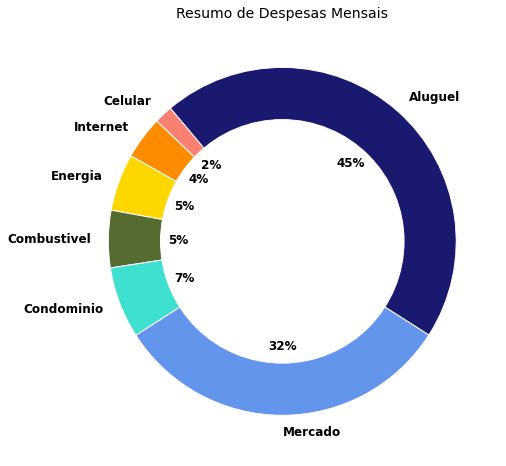

In [ ]:
expenses = {'Aluguel': 0.45152722443559096, 'Condominio': 0.06640106241699867, 'Internet': 0.0398406374501992, 'Energia': 0.05312084993359894, 'Celular': 0.017264276228419653, 'Mercado': 0.3187250996015936, 'Combustivel': 0.05312084993359894}
expenses = dict(sorted(expenses.items(), key= lambda item: item[1]))

fig3, ax3 = plt.subplots()
fig3.set_size_inches(8,8)

inside_circle=plt.Circle((0,0), 0.7, color= 'white')
figure = plt.gcf()
figure.gca().add_artist(inside_circle)
colors = ['salmon', 'darkorange', 'gold', 'darkolivegreen', 'turquoise', 'cornflowerblue', 'midnightblue', 'indigo', 'crimson']

ax3.pie(expenses.values(), labels=expenses.keys(), autopct= '%1.0f%%', pctdistance=0.6, textprops= {'fontsize':12, 'weight':'bold'}, wedgeprops= {'linewidth':1, 'edgecolor':'white'}, startangle=130, colors= colors)
ax3.set_title('Resumo de Despesas Mensais', fontdict= font1)
plt.show()

Processo
*   Massa por Colaborador
*   Ocupação por Colaborador
*   Massa por kWh Consumido
*   Aproveitamento Percentual da Capacidade de Carga (kg/kg)
*   Massa por Hora Trabalhada
*   Demanda por Segmento de Produto

Geral
*   Dias de Atraso
*   Ordens de Produção em Atraso

